In [2]:
import codecs
import random
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# euclidean 거리
# 짧은 거리를 출력 -> centers
def get_euclidean(data, center):
    # 좌표값을 주면 거리를 계산하여 리턴.
    return np.sqrt(np.dot(data - center, data - center))


In [4]:
def draw_graph(data, labels):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.show()

In [5]:
# 정규화 하는 부분
def norm(data):
    scaler = MinMaxScaler()
    data[:] = scaler.fit_transform(data[:]) # 정규화
    return data


In [6]:
# 데이터를 읽고 필요한 부분만 추출
def read_data():
    data = []
    with codecs.open('user1.txt', 'r', 'utf-8') as user:
        first_line = user.readline() # 사이트의 이름 제거
        lines = user.readlines()
        for line in lines:
            line = line.rstrip()
            data.append(line.split('\t'))
    data = np.array(data)
    data = np.delete(data, [0], 1) # 사용자의 ip 주소
    data = np.array(data, dtype=np.float)

    return data

In [7]:
class KMeans(object):
    # data: 데이터
    # n: 군집수
    def __init__(self, data, n):
        self.data = data
        self.n = n
        self.cluster = OrderedDict()  # 군집화된 구조를 체계적으로 나타내고 있음

    # 75개 중에 중복을 제외한 n개의 데이터를 뽑아냄
    # 이거는 초기에 실행되고 끝.
    def init_center(self):
        index = random.randint(0, self.n)
        index_list = []
        for i in range(self.n):
            # 위에서 뽑은 index가 index_list에 실제로 들어 있는지를 판단
            while index in index_list:
                # 중복된 값이 있으면 새로운 값을 뽑아 옴
                index = random.randint(0, self.n)
            index_list.append(index)
            # key: 중심
            self.cluster[i] = {'center': self.data[index], 'data': []}

    # 가장 가까운 center 값에 mapping 해줌
    # euclidean 거리를 이용하여 cluster dict 채움
    def clustering(self, cluster):
        center = []
        com_data = [[] for i in range(len(cluster.keys()))]
        for i in range(len(self.data)):
            eucl_data = []
            for j in range(len(cluster.keys())):
                center.append(self.cluster[j]['center'])
                euclidean = np.linalg.norm(center[j] - self.data[i])
                eucl_data.append(euclidean)
            for index in range(len(cluster.keys())):
                if (np.argmin(eucl_data) == index):
                    com_data[index].append(self.data[i])
        for i in range(len(cluster.keys())):
            self.cluster[i]['data'] = com_data[i]

        return self.cluster

    # 센터값을 모두 업데이트.
    def update_center(self):
        cen_data = [[] for i in range(self.n)]
        cen_data1 = []
        cen_data2 = []
        compare = [[] for i in range(self.n)]

        for i in range(self.n):  # 기존 센터값
            cen_data1.append(self.cluster[i].get('center'))

        for i in range(self.n):
            data_avg = np.average(self.cluster[i]['data'], axis=0)
            cen_data[i].append(data_avg)
        for i in range(self.n):
            self.cluster[i]['center'] = cen_data[i]

        for i in range(self.n):  # 바뀐 센터값
            cen_data2.append(self.cluster[i].get('center'))
        cen_data2 = [elem for twd in cen_data2 for elem in twd]

        for i in range(self.n):  # 센터값 비교
            compare[i].append(cen_data1[i] == cen_data2[i])
        compare = np.array(compare).flatten()

        return self.cluster, compare



    def update(self):
        while True:
            new_cluster, compare = self.update_center()
            chk = compare.all()
            if (chk == True):
                # print('while true',chk)
                break
            self.clustering(new_cluster)

        return

    # 외부에서 실행하는 부분
    def fit(self):
        self.init_center()
        self.cluster = self.clustering(self.cluster)
        # 여기서 계속 돌아갈 수 있게
        self.update()

        result, labels = self.get_result(self.cluster)
        draw_graph(result, labels)

    def get_result(self, cluster):
        result = []
        labels = []
        for key, value in cluster.items():
            for item in value['data']:
                labels.append(key)
                result.append(item)

        return np.array(result), labels

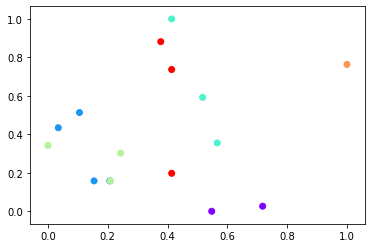

In [9]:
if __name__ == '__main__':
    data = read_data()
    data = norm(data)
    model = KMeans(data, 6)
    model.fit()
